     Model Name  Training Error  Test Error  Training Time (s)
0   AdaBoost-10        0.277114      0.2990           0.219174
1   AdaBoost-30        0.247802      0.2635           0.686453
2  AdaBoost-100        0.170237      0.2015           2.190912
3  AdaBoost-300        0.151973      0.1820           5.886043
     Model Name  Training Error  Test Error  Training Time (s)
0  AdaBoost-300        0.151973       0.182           5.886043


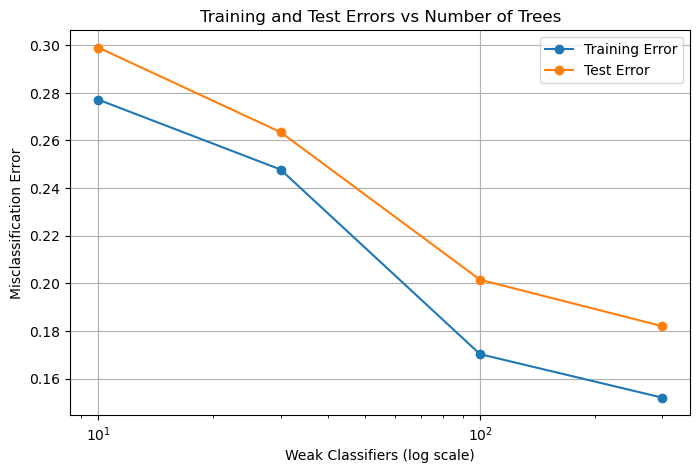

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Y.dat")
X = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\X.dat")
Y_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Ytest.dat")
X_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Xtest.dat")

weak_classifier = [10, 30, 100, 300]

model_names = []
train_error = []
test_error = []
times =[]
num_trees=[]

for k in weak_classifier:
    start_time = time.time()
    
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=k, random_state=42)
    model.fit(X, Y)

    train_err = 1 - model.score(X,Y)
    test_err = 1 - model.score(X_test,Y_test)
    
    total_t = time.time() - start_time
   
    model_names.append(f"AdaBoost-{k}")
    train_error.append(train_err)
    test_error.append(test_err)
    times.append(total_t)
    
    
    results_df = pd.DataFrame({
    "Model Name": model_names,
    "Training Error": train_error,
    "Test Error": test_error,
    "Training Time (s)": times,
    })

print(results_df)

min_test_error_index = test_error.index(min(test_error))
best_combination = {
    "Model Name": model_names[min_test_error_index],
    "Training Error": train_error[min_test_error_index],
    "Test Error": test_error[min_test_error_index],
    "Training Time (s)": times[min_test_error_index]
}
best_results_df = pd.DataFrame([best_combination])

print(best_results_df)

plt.figure(figsize=(8, 5))
plt.semilogx(weak_classifier, train_error, marker='o', label="Training Error")
plt.semilogx(weak_classifier, test_error, marker='o', label="Test Error")
plt.xlabel("Weak Classifiers (log scale)")
plt.ylabel("Misclassification Error")
plt.title("Training and Test Errors vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()

